In [1]:

import numpy as np

import model
from model import MyDataSet

import torch
import torch.utils.data as Data

from model import MyDataSet,generate_process,process2
import model
import matplotlib.pyplot as plt
%reload_ext autoreload
%autoreload 2

In [7]:

save_path3   = 'last_result_8/'
pic_path     = 'test_pic/'

noise_dim  = 8
mesh2num   = 8
BATCH_SIZE = 128
batch_size = BATCH_SIZE
ffd_dim    = (3,7,1)
point_num  = (ffd_dim[0]+1)*(ffd_dim[1]+1)*(ffd_dim[2]+1)
dim_mesh   = (18,68,3)
upper_vdim = 64
lower_vdim = 11
device     = 'cpu'
mesh2num_model = model.ConvNet(mesh2num).to(device) 
G = model.DeepConvNet3(noise_dim + mesh2num,point_num,upper_vdim).to(device)
D = model.DeepConvNet2(batch_size,1).to(device) #输出为1维向量

mesh2num_model.load_state_dict(torch.load(save_path3 +"m2n_param.pkl"))
G.load_state_dict(torch.load(save_path3 +"generator_param.pkl"))
D.load_state_dict(torch.load(save_path3 +"discriminator_param.pkl"))


<All keys matched successfully>

In [2]:
data_root   = 'F:\\graduate_student\\T2_GANpropeller\\test2\\1_model\\grid_mesh\\'

base_meshs = np.load(data_root + 'mesh_data_test.npy')
mean_mesh = np.mean(base_meshs,0)

print(base_meshs.shape)
base_mesh = torch.from_numpy(mean_mesh)


(4452, 18, 68, 3)


In [10]:
"""
p1 = generate_process(batch_size=64, noise_size=noise_dim,mesh2num=mesh2num,upper=upper_vdim,device=device)

p2 = process2(p1,mesh2num_model,G,D)


for i in range(8):
    fake_ffdpca = p2.sample(base_mesh,0,pic_path,False)
    np.save( pic_path + '/' +str(i), fake_ffdpca)
"""

# 作图展示连续性

In [5]:
import sys
sys.path.append('F:\\graduate_student\\T2_GANpropeller\\test5\\2_experiments\\FFD_PCA')
from draw import draw_geom_line

In [6]:
from pyDOE import lhs
import matplotlib.image as img
import matplotlib.pyplot as plt
def get_group(name_list,save_path,pic_width,pic_heigh,figsize=(20,6)):
    column,row = len(name_list),len(name_list[0])
    
    fig = plt.figure(figsize=figsize)
    fig.tight_layout()
    for i in range(column):
        for j in range(row):

            posi = j + i * row + 1
          
            ax = fig.add_subplot(column,row,posi)
            ax.axis('off')
            im   = img.imread(name_list[i][j])
            s = im.shape
            left  = (s[0] - pic_width)//2
            right = (s[0] + pic_width)//2
            below = (s[1] - pic_heigh)//2 
            upper = (s[1] + pic_heigh)//2

            im   = im[left:right ,below:upper,:]
            ax.imshow(im)

    plt.savefig(save_path)
    plt.show()
    plt.close()


import os
# all_files = os.listdir(path)

# # 仅保留以".png"结尾的文件
# png_files = [file for file in all_files if file.endswith('.png')]

In [7]:
for a in range(2,8):
    # a = 1
    data = np.load('test_pic/' + str(a)+ '.npy')
    save_path = 'test_pic/' + str(a) + '/'

    for j in range(data.shape[0]):
        name = str(j).zfill(4)
        draw_geom_line(data[j],name,save_path,-20,15)

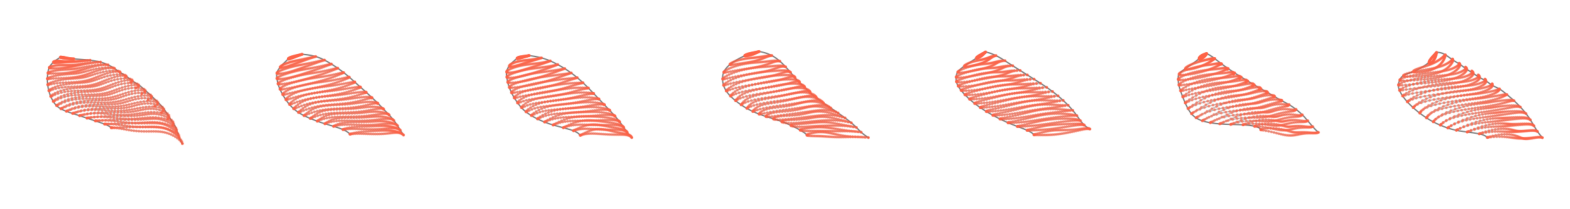

In [8]:
list = [10,13,23,28,35,41,51]
name_list = [[ 'test_pic/0/'+str(_).zfill(4)+'.png' for _ in list ]]

width,heigh = 300,300
save_path   = 'test_pic/0.png'

get_group(name_list,save_path,width,heigh)


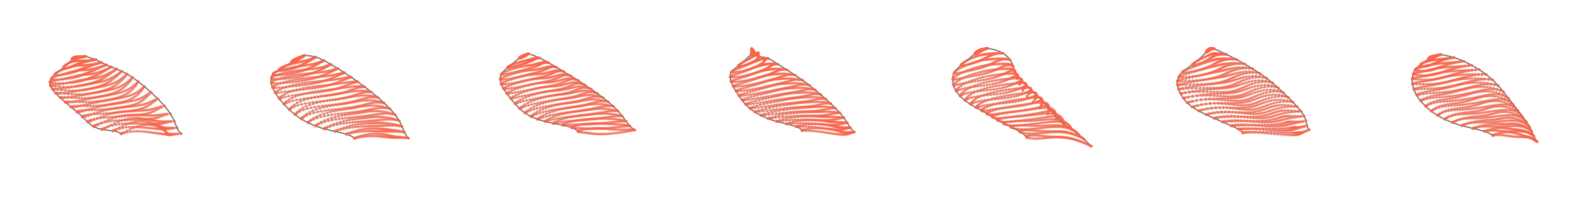

In [9]:
list = [0,2,21,25,35,60,61]
name_list = [[ 'test_pic/1/'+str(_).zfill(4)+'.png' for _ in list ]]

width,heigh = 300,300
save_path   = 'test_pic/1.png'

get_group(name_list,save_path,width,heigh)

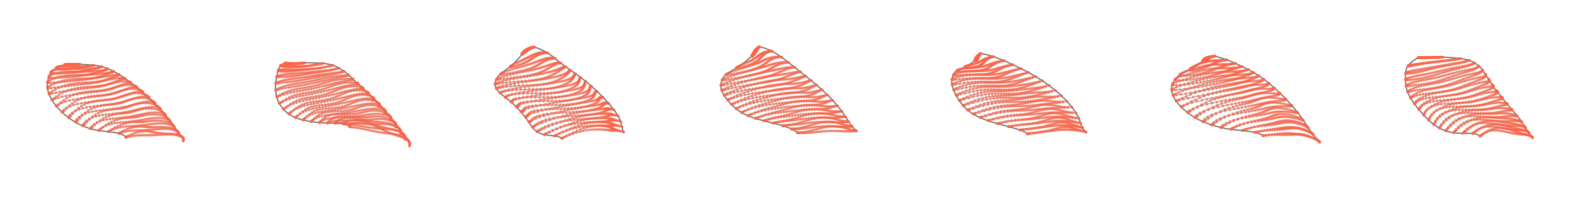

In [10]:
list = [0,6,31,41,47,53,61]
name_list = [[ 'test_pic/2/'+str(_).zfill(4)+'.png' for _ in list ]]

width,heigh = 300,300
save_path   = 'test_pic/2.png'

get_group(name_list,save_path,width,heigh)

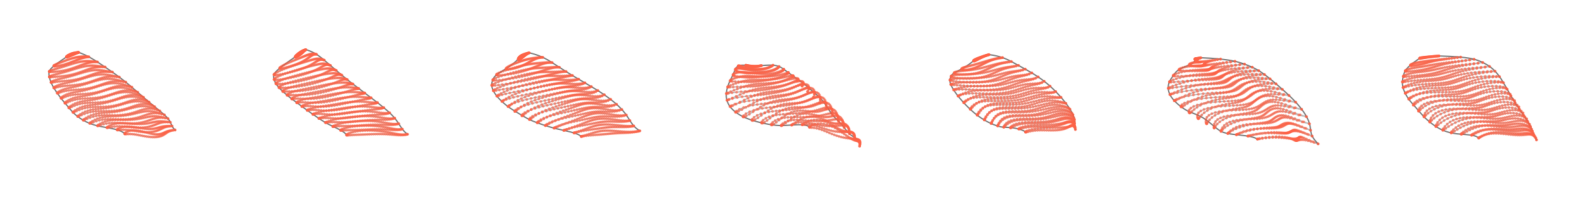

In [11]:
list = [0,1,9,12,16,43,53]
name_list = [[ 'test_pic/4/'+str(_).zfill(4)+'.png' for _ in list ]]

width,heigh = 300,300
save_path   = 'test_pic/4.png'

get_group(name_list,save_path,width,heigh)

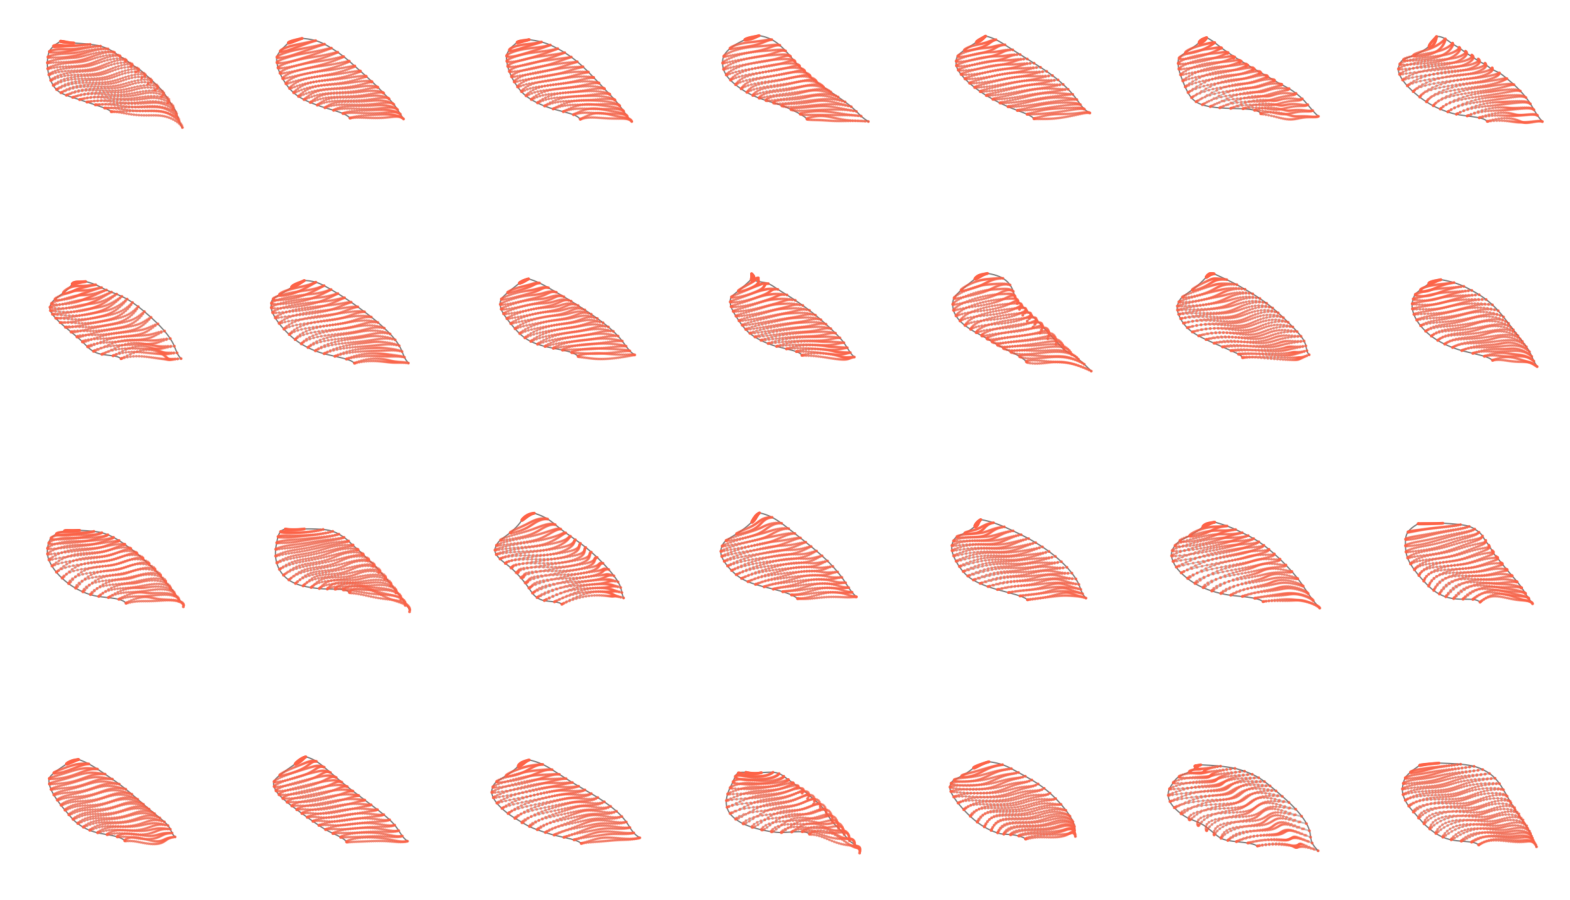

In [12]:
list = [10,13,23,28,35,41,51]
name_list1 = [ 'test_pic/0/'+str(_).zfill(4)+'.png' for _ in list ]
list = [0,2,21,25,35,60,61]
name_list2 = [ 'test_pic/1/'+str(_).zfill(4)+'.png' for _ in list ]
list = [0,6,31,41,47,53,61]
name_list3 = [ 'test_pic/2/'+str(_).zfill(4)+'.png' for _ in list ]
list = [0,1,9,12,16,43,53]
name_list4 = [ 'test_pic/4/'+str(_).zfill(4)+'.png' for _ in list ]

name_list = [name_list1,name_list2,name_list3,name_list4]
width,heigh = 250,300
save_path   = 'test_pic/total.png'
get_group(name_list,save_path,width,heigh,(20,12))
